In [3]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for opencv-python: filename=opencv_python-4.7.0.72-cp36-cp36m-win_amd64.whl size=37376633 sha256=08226a1f2971b817c5f3ff66175dba699a30e66e4bed9a1007d82ba83f09b34d
  Stored in directory: c:\users\lynn9106\appdata\local\pip\cache\wheels\c6\31\a6\08cdd9fd7701b81f6f1904395d29e4782bded92e628db01778
Successfully built opencv-python
  Using cached opencv-python-4.7.0.72.tar.gz (91.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finish

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def Sobel_edge_detection(f):
    grad_x = cv2.Sobel(f, cv2.CV_64F, 1, 0, ksize = 3)
    grad_y = cv2.Sobel(f, cv2.CV_64F, 0, 1, ksize = 3)
    magnitude = abs(grad_x) + abs(grad_y)   # 求影像梯度
    g = np.uint8(np.clip(magnitude, 0, 255))        # 將值截斷在範圍 [0, 255] 
    ret, g = cv2.threshold(g, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) # 用Threshold函式求邊緣偵測的結果影像，其中套用OTSU演算法

    return g

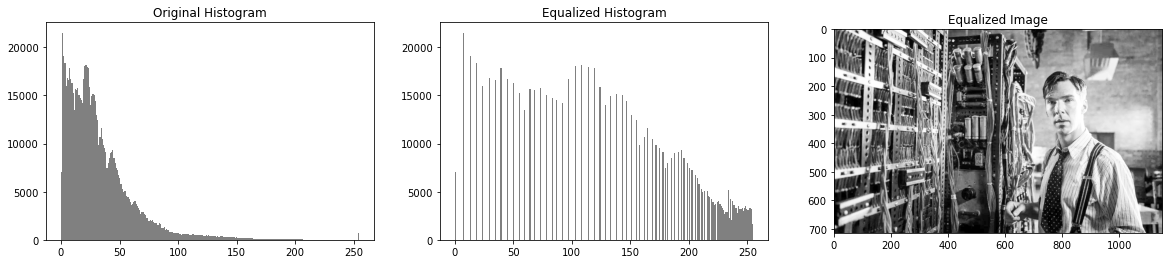

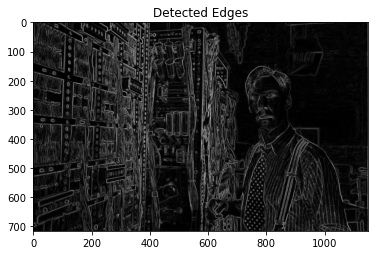

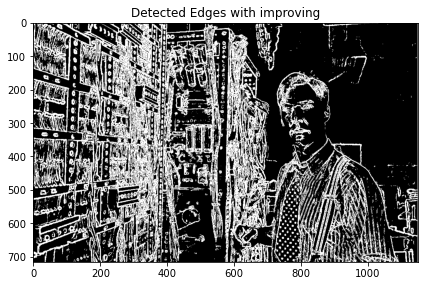

In [22]:
# 讀取image
img = cv2.imread('input_image.bmp', 0)  # Read as grayscale (0)

# histogram equalization
equalized_img = cv2.equalizeHist(img)

# Sobel Edge detection
gradient_x = cv2.Sobel(equalized_img, cv2.CV_64F, 1, 0, ksize=3)        # 計算x方向梯度
gradient_y = cv2.Sobel(equalized_img, cv2.CV_64F, 0, 1, ksize=3)        # 計算y方向梯度
edges = cv2.magnitude(gradient_x, gradient_y)       # 儲存至edges中


# 做梯度大小的範圍調整和二值化處理獲得更清晰圖像
OTSU_edges = Sobel_edge_detection(equalized_img)


# Original histogram
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.hist(img.ravel(), bins=256, color='gray')
plt.title('Original Histogram')

# equalized histogram
plt.subplot(1, 3, 2)
plt.hist(equalized_img.ravel(), bins=256, color='gray')
plt.title('Equalized Histogram')

# processed image after histogram equalization
plt.subplot(1, 3, 3)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

# Detected edges in the image after edge detection
plt.figure(figsize=(6, 6))
plt.imshow(edges, cmap='gray')
plt.title('Detected Edges')

# Detected edges in the image after edge detection with improving
plt.figure(figsize=(6, 6))
plt.imshow(OTSU_edges, cmap='gray')
plt.title('Detected Edges with improving')

# Show the plots
plt.tight_layout()
plt.show()

In [1]:
!jupyter nbconvert --to script main.ipynb

[NbConvertApp] Converting notebook main.ipynb to script
[NbConvertApp] Writing 2009 bytes to main.py
